In [1]:
# importing libraries 
import pandas            as pd                       # data science essentials
import numpy as np                                   # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier            # random forest
from sklearn.ensemble import GradientBoostingClassifier        # gbm
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer


# loading data
file = "./GOT_character_predictions.xlsx"

got_dataset= pd.read_excel(io= file)




# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got_dataset.head(n = 5)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got_dataset.head(n=20)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


#Checking for missing values and replacing them

In [2]:
# method chaining!
print(got_dataset.isnull().sum(axis=0))

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64


In [3]:
fill = 'no_title'
got_dataset['title'] = got_dataset['title'].fillna(value = fill)
got_dataset['has_title'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'title'] != 'no_title':
        got_dataset.loc[index, 'has_title'] = 1
print(got_dataset['title'].isnull().any())

# filling dateOfBirth NAs with MODE
got_dataset['dateOfBirth'].fillna(int(got_dataset['dateOfBirth'].mode()), inplace=True)

# checking to make sure NAs are filled in
print(got_dataset['dateOfBirth'].isnull().any())

# filling dateOfBirth NAs with MODE
got_dataset['age'].fillna(int(got_dataset['age'].median()), inplace=True)

# checking to make sure NAs are filled in
print(got_dataset['age'].isnull().any())
# culture 
fill = 'no_culture'
got_dataset['culture'] = got_dataset['culture'].fillna(value = fill)
got_dataset['has_culture'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'culture'] != 'no_culture':
        got_dataset.loc[index, 'has_culture'] = 1
print(got_dataset['culture'].isnull().any())
# mother
fill = 'm_mother'
got_dataset['mother'] = got_dataset['mother'].fillna(value = fill)
got_dataset['known_mother'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'mother'] != 'm_mother':
        got_dataset.loc[index, 'known_mother'] = 1
print(got_dataset['mother'].isnull().any())
# father
fill = 'm_father'
got_dataset['father'] = got_dataset['father'].fillna(value = fill)
got_dataset['known_father'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'father'] != 'm_father':
        got_dataset.loc[index, 'known_father'] = 1
print(got_dataset['father'].isnull().any())
# heir
fill = 'm_heir'
got_dataset['heir'] = got_dataset['heir'].fillna(value = fill)
got_dataset['known_heir'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'heir'] != 'm_heir':
        got_dataset.loc[index, 'known_heir'] = 1
print(got_dataset['heir'].isnull().any())
# house 
fill = 'm_house'
got_dataset['house'] = got_dataset['house'].fillna(value = fill)
got_dataset['known_house'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'house'] != 'm_house':
        got_dataset.loc[index, 'known_house'] = 1
print(got_dataset['house'].isnull().any())
# spouse 
fill = 'm_spouse'
got_dataset['spouse'] = got_dataset['spouse'].fillna(value = fill)
got_dataset['known_spouse'] = 0
for index, value in got_dataset.iterrows():
    if got_dataset.loc[index, 'spouse'] != 'm_spouse':
        got_dataset.loc[index, 'known_spouse'] = 1
print(got_dataset['spouse'].isnull().any())

False
False
False
False
False
False
False
False
False


In [4]:
# making dummy where m_spouse = 0 and those with spouse = 1
for index, value in got_dataset.iterrows():
    
    # Creating a dummy for has_spouse = 1, so missing values = 0
    if got_dataset.loc[index, 'known_spouse'] == 1:
        got_dataset.loc[index, 'isAliveSpouse'] = 1
        
    elif got_dataset.loc[index, 'known_spouse'] == 0:
        got_dataset.loc[index, 'isAliveSpouse'] = 0

In [5]:
# making dummy where m_father = 0 and those with spouse = 1
for index, value in got_dataset.iterrows():
    
    # Creating a dummy for has_father = 1, so missing values = 0
    if got_dataset.loc[index, 'known_father'] == 1:
        got_dataset.loc[index, 'isAliveFather'] = 1
        
    elif got_dataset.loc[index, 'known_father'] == 0:
        got_dataset.loc[index, 'isAliveFather'] = 0

In [6]:
# making dummy where m_heir = 0 and those with spouse = 1
for index, value in got_dataset.iterrows():
    
    # Creating a dummy for has_heir = 1, so missing values = 0
    if got_dataset.loc[index, 'known_heir'] == 1:
        got_dataset.loc[index, 'isAliveHeir'] = 1
        
    elif got_dataset.loc[index, 'known_heir'] == 0:
        got_dataset.loc[index, 'isAliveHeir'] = 0

In [7]:
# making dummy where m_mother = 0 and those with spouse = 1
for index, value in got_dataset.iterrows():
    
    # Creating a dummy for has_mother = 1, so missing values = 0
    if got_dataset.loc[index, 'known_mother'] == 1:
        got_dataset.loc[index, 'isAliveMother'] = 1
        
    elif got_dataset.loc[index, 'known_mother'] == 0:
        got_dataset.loc[index, 'isAliveMother'] = 0

In [8]:
# method chaining!
print(got_dataset.isnull().sum(axis=0))

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
has_title                     0
has_culture                   0
known_mother                  0
known_father                  0
known_heir                    0
known_house                   0
known_sp

#Searching for best variables combination that produces low BIC

In [9]:
#printing correlation matrix
got_dataset_corr=got_dataset.corr().round(decimals=2)

print(got_dataset_corr.loc['isAlive'].sort_values(ascending = False))

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
known_house                  -0.04
has_culture                  -0.04
has_title                    -0.04
isMarried                    -0.05
dateOfBirth                  -0.05
known_spouse                 -0.05
isAliveSpouse                -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.13
known_heir                   -0.13
S.No                         -0.13
isAliveFather                -0.14
isAliveMother                -0.14
known_mother                 -0.14
known_father                 -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64


In [10]:
# declaring explanatory variables
got_data=got_dataset.drop('isAlive', axis=1)


# declaring response variable
got_target=got_dataset.loc[:, 'isAlive']

In [11]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [12]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



In [13]:
# printing the variables
for val in got_dataset:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 isAlive + 
 has_title + 
 has_culture + 
 known_mother + 
 known_father + 
 known_heir + 
 known_house + 
 known_spouse + 


In [14]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~    dateOfBirth + 
                                                     book2_A_Clash_Of_Kings + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows +
                                                     numDeadRelations + 
                                                     age +
                                                     popularity
                                                     
                                                     
                                                    
                                                     
                                                     """,
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.445989
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.213     
Dependent Variable:    isAlive             AIC:                 1317.3954 
Date:                  2021-12-06 15:41    BIC:                 1359.6794 
No. Observations:      1459                Log-Likelihood:      -650.70   
Df Model:              7                   LL-Null:             -827.24   
Df Residuals:          1451                LLR p-value:         2.6879e-72
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        14.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -28.9366   4.3735 -6.6163 0.0000 -37.5085 -20.3646
dateOfBirth               0.0960   0.0140  6.8696 0.0000   0.0686   0.1234
book2_A_Clash_Of_Kings   -0.5252   0.1562 -3.3617 0.0008  -0.8314  -0.2190
book3_A_Storm_Of_Swords  -0.3944   0.1676 -2.3537 0.0186  -0.7229  -0.0660
book4_A_Feast_For_Crows   1.7452   0.1693 10.3101 0.0000   1.4134   2.0770
numDeadRelations         -0.0360   0.0601 -0.5989 0.5492  -0.1539   0.0819
age                       0.0960   0.0140  6.8623 0.0000   0.0686   0.1235
popularity               -1.5108   0.4962 -3.0444 0.0023  -2.4834  -0.5382
==========================================================================

"""

In [15]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['name','title','culture','dateOfBirth','mother','father','heir','house','spouse','book1_A_Game_Of_Thrones',  
 'book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons','isAliveMother','isAliveFather',  
 'isAliveHeir','isAliveSpouse','isMarried','isNoble','age','numDeadRelations','popularity','has_title','has_culture',  
 'known_mother','known_father','known_heir','known_house','known_spouse'],
 

 # significant variables only (set 1)
 'logit_sig'   : ['dateOfBirth','book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows',
                 'numDeadRelations','age']

}

In [16]:
# declaring explanatory variables
got_data=got_dataset.drop('isAlive', axis=1)


# declaring response variable
got_target=got_dataset.loc[:, 'isAlive']

In [17]:
# train/test split with the full model
got_data   =  got_dataset.loc[ : , candidate_dict['logit_sig']]
got_target =  got_dataset.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.1,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.763
Testing  ACCURACY: 0.7846


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[  8  42]
 [  0 145]]


In [19]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 8
False Positives: 42
False Negatives: 0
True Positives : 145



In [20]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.58


In [21]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [22]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8395
Full Tree Testing ACCURACY : 0.8513
Full Tree AUC Score: 0.7428


In [23]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 5
True Positives : 140



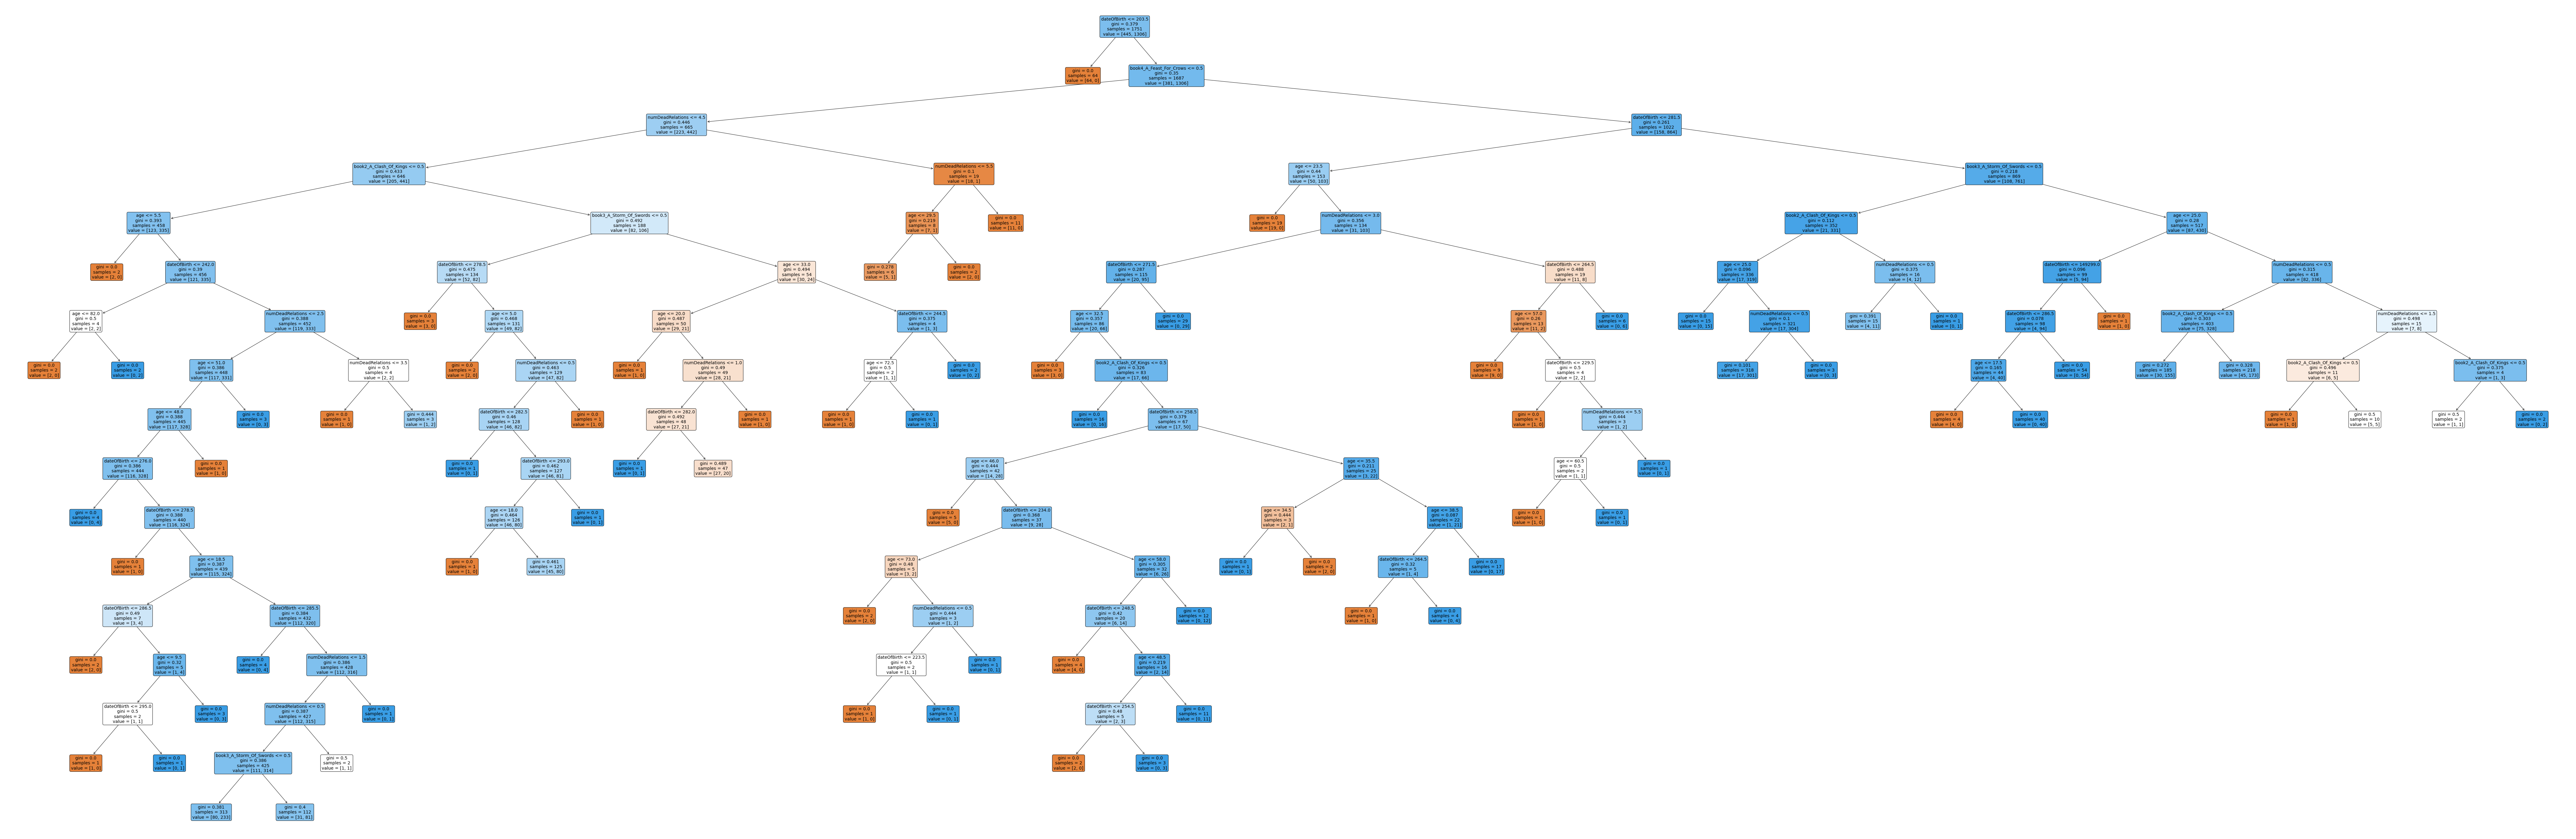

In [24]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got_data.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [25]:
#CREATE EXCEL FILE TO COMPARE RESULTS
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                         (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('.\got_classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.58         (8, 42, 0, 145)
Full Tree     0.7428         (26, 24, 5, 140)



In [26]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 5
True Positives : 140



In [27]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(2) # auc

Full Tree Training ACCURACY: 0.8395
Full Tree Testing ACCURACY : 0.8564
Full Tree AUC Score: 0.7462


In [28]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth=4,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7995
Testing  ACCURACY: 0.8359
AUC Score        : 0.68


In [29]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [30]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.799
Testing  ACCURACY: 0.8051
AUC Score        : 0.62


In [31]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 12
False Positives: 38
False Negatives: 0
True Positives : 145



In [32]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8332
Testing ACCURACY : 0.8513
AUC Score        : 0.71


In [33]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8332
Testing ACCURACY : 0.8513
AUC Score        : 0.71


In [36]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 0
True Positives : 145



In [40]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.58,0.7630,0.7846,"(8, 42, 0, 145)"
1,Full Tree,0.75,0.8395,0.8564,"(26, 24, 5, 140)"
2,GBM (Full),0.71,0.8332,0.8513,"(21, 29, 0, 145)"
3,GBM (Full),0.71,0.8332,0.8513,"(21, 29, 0, 145)"


In [39]:
# declaring a hyperparameter space
learn_range        = np.arange(0.1, 2.2, 0.5)
estimator_range    = np.arange(100, 501, 25)
depth_range        = np.arange(2, 11, 2)
warm_start_range   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_range,
              'max_depth'     : depth_range,
              'n_estimators'  : estimator_range,
              'warm_start'    : warm_start_range}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 500,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'n_estimators': 225, 'max_depth': 6, 'learning_rate': 0.6}
Tuned Training AUC: 0.6647


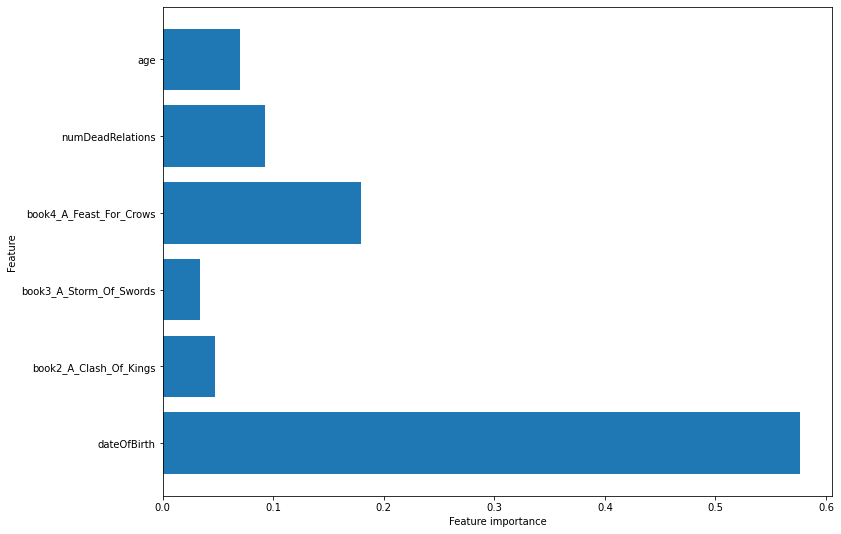

In [34]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = x_train,
                         export = False)

In [35]:
#CREATE EXCEL FILE TO COMPARE RESULTS
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree(*)  {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}

Final model(*)
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                         (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('.\got_classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.58         (8, 42, 0, 145)
Full Tree(*)  0.75         (26, 24, 5, 140)

Final model(*)

